<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Análisis Exploratorio de datos</header1></center>

# Instalación de librerias

In [2]:
#Para esta actividad se instalarán las siguientes librerías:
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install ann_visualizer

# Importación de librerias necesarias

In [3]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar el Dataset

In [5]:
# Cargamos el Dataset
url = 'https://raw.githubusercontent.com/LeidyYasaca/datos_TFM/refs/heads/main/dataset_consumo.csv'
df= pd.read_csv(url)

## Analisis descriptivo

### Visualizacion del Dataset

Se muestran las 5 primeras instancias del dataset, para hechar un vistazo:

In [6]:
df.head(5)

Categoría de clientes Subcategoría  \
0      Demanda Regulada  Residencial   
1      Demanda Regulada   Industrial   
2      Demanda Regulada    Comercial   
3      Demanda Regulada        Otros   
4      Demanda Regulada         SAPG   

   Energía facturada por servicio electrico (GWh)  \
0                                         8070.80   
1                                         4831.74   
2                                         3343.20   
3                                         2306.93   
4                                         1442.95   

  Energía facturada por servicio electrico (%)      Mes   Año  
0                                       37.63%  Febrero  2021  
1                                       22.53%  Febrero  2021  
2                                       15.59%  Febrero  2021  
3                                       10.75%  Febrero  2021  
4                                        6.73%  Febrero  2021

### Inspección de los datos

In [7]:
# Dimensiones del dataset (filas, columnas)
print('Dimensiones del dataset (filas, columnas):', df.shape)

# Nombre de las columnas
print('\nNombre de las columnas:', df.columns.values)

# Tipo de datos de cada columna
print('\nTipo de datos de cada columna:', df.dtypes)

Dimensiones del dataset (filas, columnas): (264, 6)

Nombre de las columnas: ['Categoría de clientes' 'Subcategoría'
 'Energía facturada por servicio electrico (GWh)'
 'Energía facturada por servicio electrico (%)' 'Mes' 'Año']

Tipo de datos de cada columna: Categoría de clientes                              object
Subcategoría                                       object
Energía facturada por servicio electrico (GWh)    float64
Energía facturada por servicio electrico (%)       object
Mes                                                object
Año                                                 int64
dtype: object


In [8]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Categoría de clientes                           264 non-null    object 
 1   Subcategoría                                    264 non-null    object 
 2   Energía facturada por servicio electrico (GWh)  264 non-null    float64
 3   Energía facturada por servicio electrico (%)    264 non-null    object 
 4   Mes                                             264 non-null    object 
 5   Año                                             264 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 12.5+ KB


In [9]:
# Resumen estadístico (solamente se calcula en variables numéricas)
df= df.drop(columns=['Energía facturada por servicio electrico (%)'], errors='ignore')
df.describe().T

count         mean  \
Energía facturada por servicio electrico (GWh)  264.0  3990.234432   
Año                                             264.0  2022.431818   

                                                        std      min      25%  \
Energía facturada por servicio electrico (GWh)  2413.942314  1441.41  1747.66   
Año                                                1.076490  2021.00  2021.75   

                                                    50%      75%      max  
Energía facturada por servicio electrico (GWh)  3161.06  6084.61  8790.99  
Año                                             2022.00  2023.00  2024.00

In [10]:
# Convertir columnas categóricas a str y eliminar espacios vacios en celdas
df['Subcategoría'] = df['Subcategoría'].astype(str).str.strip()

In [11]:
# Conteo de valores de los atributos de entrada categóricos
columnas_cat = ['Categoría de clientes', 'Subcategoría'] 
tablas = []
for col in columnas_cat:
    count = df[col].value_counts().reset_index()
    count.columns = [col, 'Frecuencia']
    tablas.append(count)
combined_table = pd.concat(tablas, axis=1)
combined_table

Categoría de clientes  Frecuencia         Subcategoría  Frecuencia
0      Demanda Regulada       220.0          Residencial          44
1   Demanda No Regulada        44.0           Industrial          44
2                   NaN         NaN            Comercial          44
3                   NaN         NaN                Otros          44
4                   NaN         NaN                 SAPG          44
5                   NaN         NaN  Demanda No Regulada          44

## Ajuste de tipos de variables

In [12]:
# Diccionario para convertir nombres de meses a números
meses_dict = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5, "Junio": 6,
    "Julio": 7, "Agosto": 8, "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}

# Convertir el mes a número
df["Mes_Numero"] = df["Mes"].map(meses_dict)

# Crear nueva columna de tipo fecha (usando el día 1 por defecto)
df["Fecha"] = pd.to_datetime(df["Año"].astype(str) + "-" + df["Mes_Numero"].astype(str) + "-01")

# Verificar el resultado
df[["Año", "Mes", "Fecha"]].head()

Año      Mes      Fecha
0  2021  Febrero 2021-02-01
1  2021  Febrero 2021-02-01
2  2021  Febrero 2021-02-01
3  2021  Febrero 2021-02-01
4  2021  Febrero 2021-02-01

In [13]:
# Eliminar columnas innecesarias para el análisis posterior
df= df.drop(columns=['Mes_Numero','Mes', 'Año'], errors='ignore')
df.head()

Categoría de clientes Subcategoría  \
0      Demanda Regulada  Residencial   
1      Demanda Regulada   Industrial   
2      Demanda Regulada    Comercial   
3      Demanda Regulada        Otros   
4      Demanda Regulada         SAPG   

   Energía facturada por servicio electrico (GWh)      Fecha  
0                                         8070.80 2021-02-01  
1                                         4831.74 2021-02-01  
2                                         3343.20 2021-02-01  
3                                         2306.93 2021-02-01  
4                                         1442.95 2021-02-01

## Detección y tratamiento de datos ausentes

In [14]:
# Ver cuántos valores faltan en cada columna
df.isnull().sum()

Categoría de clientes                             0
Subcategoría                                      0
Energía facturada por servicio electrico (GWh)    0
Fecha                                             0
dtype: int64

El dataset no contiene valores desconocidos

In [15]:
# Si fuera el caso de existir valores nulos en el dataset, se pueden realizar las siguientes acciones:
# Opciones para tratar valores nulos:
# 1. Eliminar filas con valores nulos
#df_cleaned = df.dropna()

# 2. Rellenar valores nulos con un valor específico (ejemplo: 0 o la media)
#df_filled = df.fillna(df.mean())  

## Identificación de datos atípicos

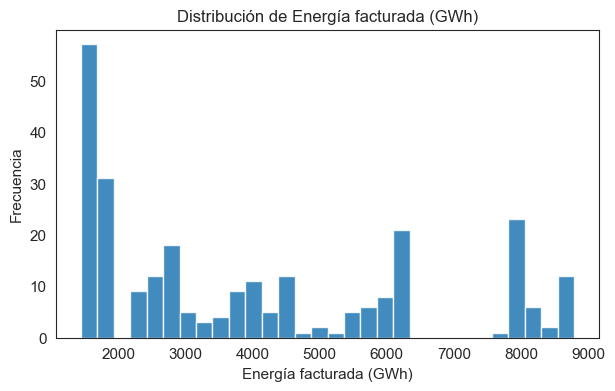

In [29]:
# Histograma de Producción Total (GWh)
sns.set_style("white")
plt.figure(figsize=(7, 4))
plt.hist(df["Energía facturada por servicio electrico (GWh)"], bins=30, color="#1f77b4", edgecolor="white", alpha=0.85)
plt.xticks(fontsize=11) 
plt.yticks(fontsize=11)
plt.title("Distribución de Energía facturada (GWh)", fontsize=12)
plt.xlabel("Energía facturada (GWh)", fontsize=11)
plt.ylabel("Frecuencia", fontsize=11)
plt.show()

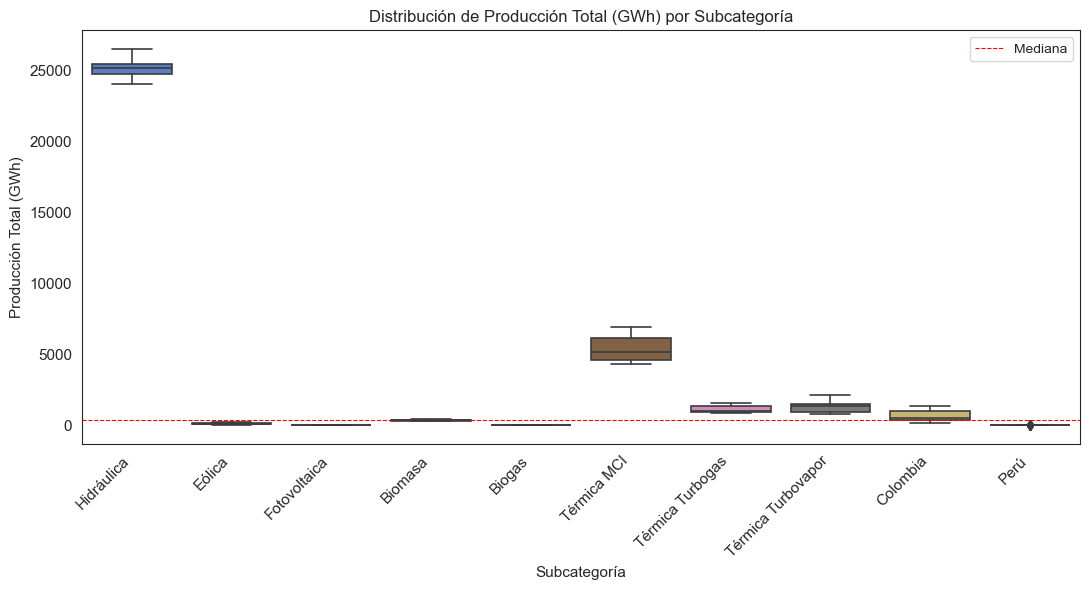

In [79]:
# Boxplot por subcategoria (Para comparar distribuciones)
sns.set_style("white")
plt.figure(figsize=(11,6))
sns.boxplot(x=df["Subcategoría"], y=df["Producción Total (GWh)"], palette="muted", linewidth=1.2)
plt.xticks(rotation=45, ha="right", fontsize=11) 
plt.yticks(fontsize=11)
plt.axhline(y=df["Producción Total (GWh)"].median(), color='red', linestyle='--', label="Mediana", linewidth=0.8)
plt.title("Distribución de Producción Total (GWh) por Subcategoría", fontsize=12)
plt.xlabel("Subcategoría", fontsize=11)
plt.ylabel("Producción Total (GWh)", fontsize=11)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [80]:
# Reemplazar valores de 0, para que sirva la escala logarítmica
df["Producción Total (GWh)"] = df["Producción Total (GWh)"].replace(0, 0.01)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


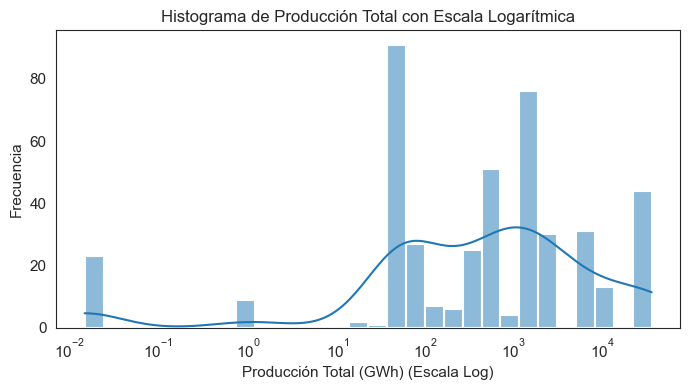

In [81]:
# Histograma de Producción Total (GWh) con escala logarítmica
sns.set_style("white")
plt.figure(figsize=(7,4))
sns.histplot(df[df["Producción Total (GWh)"] > 0], x="Producción Total (GWh)", 
             bins=30, log_scale=True, kde=True, color="#1f77b4", linewidth=1.5)
plt.xticks(ha="right", fontsize=11) 
plt.yticks(fontsize=11)
plt.xlabel("Producción Total (GWh) (Escala Log)", fontsize=11)
plt.ylabel("Frecuencia", fontsize=11)
plt.title("Histograma de Producción Total con Escala Logarítmica", fontsize=12)
plt.tight_layout()
plt.show()

## Correlación de variables

In [82]:
# Excluir columnas no numéricas
df_numeric = df.drop(columns=['Energía Eléctrica (categoría)', 'Subcategoría', 'Fecha'])
correlation_matrix = df_numeric.corr()

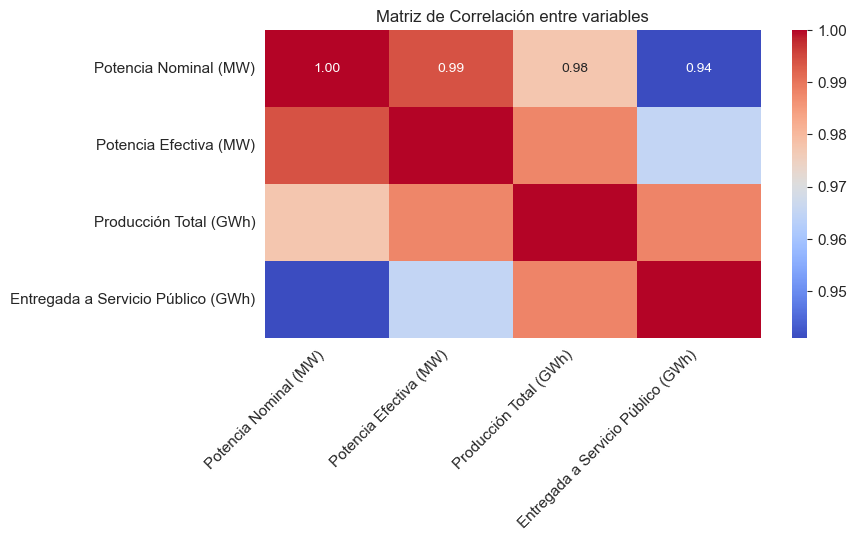

In [84]:
# Mapa de calor de correlaciones
plt.figure(figsize=(8, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=11)  
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title("Matriz de Correlación entre variables", fontsize=12)
plt.show()

## Análisis temporal

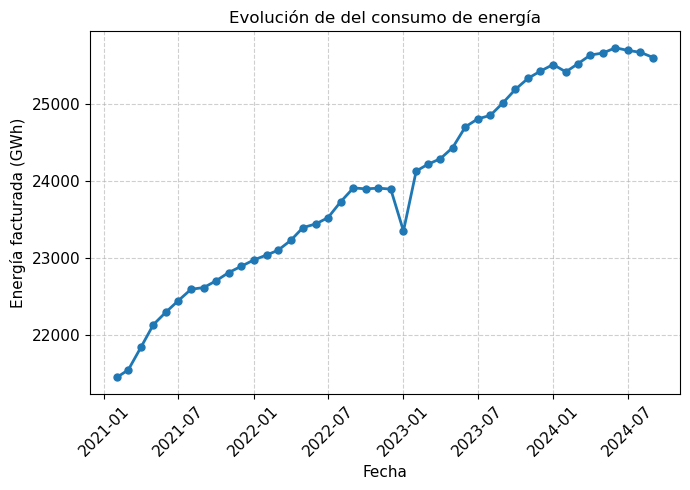

In [17]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(df.groupby("Fecha")["Energía facturada por servicio electrico (GWh)"].sum(), 
        marker="o", color="#1f77b4", linewidth=2, markersize=5)
ax.set_title("Evolución de del consumo de energía", fontsize=12)
ax.set_xlabel("Fecha", fontsize=11)
ax.set_ylabel("Energía facturada (GWh)", fontsize=11)
ax.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()